# Laptop Price Prediction System (Commodity Prediction Project)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('laptop_data.csv')

### Basic Analysis of Data

In [4]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

## Some feature engineering

In [8]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [10]:
# Clean column names: (lowercase + no spaces + no special characters)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[^\w]', '', regex=True)
)


In [11]:
df.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

In [12]:
df['ram'] = df['ram'].str.replace('GB', '').astype(int)
df['weight'] = df['weight'].str.replace('kg', '').astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [14]:
# Create a new column 'touchscreen' to indicate if the screen is touchscreen or not
df['touchscreen'] = df['screenresolution'].apply(lambda x: 1 if 'touchscreen' in x.lower() else 0)

In [15]:
# Create a new column 'ips' to indicate if the screen is IPS or not
df['ips'] = df['screenresolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)

In [16]:
df['touchscreen'].value_counts()    

touchscreen
0    1111
1     192
Name: count, dtype: int64

In [17]:
df['screenresolution'].str.split().sample(5)

929                            [1366x768]
1105                           [1366x768]
1238                [Full, HD, 1920x1080]
531     [IPS, Panel, Full, HD, 1920x1080]
656                 [Full, HD, 1920x1080]
Name: screenresolution, dtype: object

In [18]:
df['screenresolution'].head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: screenresolution, dtype: object

In [19]:
res = df['screenresolution'].str.extract(r'(\d+)\s*x\s*(\d+)') # res is a dataframe containing two columns as 0 and 1

df[['x_res', 'y_res']] = res.astype(int) 


In [20]:
res.head()

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600


In [21]:
type(res)

pandas.core.frame.DataFrame

In [22]:
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [24]:
df.select_dtypes(include='number').corr()['price']


inches         0.068197
ram            0.743007
weight         0.210370
price          1.000000
touchscreen    0.191226
ips            0.252208
x_res          0.556529
y_res          0.552809
Name: price, dtype: float64

In [25]:
df['ppi'] = (df['x_res']**2 + df['y_res']**2)**0.5 / df['inches']

In [26]:
df.select_dtypes(include='number').corr()['price']

inches         0.068197
ram            0.743007
weight         0.210370
price          1.000000
touchscreen    0.191226
ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: price, dtype: float64

In [27]:
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [28]:
df.drop(columns=['screenresolution', 'inches', 'x_res', 'y_res'], inplace=True)

In [29]:
df.head(3)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [30]:
df['cpu'].value_counts()

cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [31]:
df['cpu_name'] = df['cpu'].apply(lambda x: " ".join((x.split()[0:3])))

In [32]:
df.head(2)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [33]:
def fetch_cpu_brand(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if 'Intel' in text:
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [34]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_cpu_brand)

In [35]:
df.sample(5)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name,cpu_brand
1071,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,63882.72,0,0,100.454670,Intel Core i5,Intel Core i5
283,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,30849.12,0,0,141.211998,Intel Core i5,Intel Core i5
699,HP,Notebook,Intel Core i7 7500U 2.7GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.10,36709.92,0,1,141.211998,Intel Core i7,Intel Core i7
466,Acer,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.20,24988.32,0,0,100.454670,Intel Core i3,Intel Core i3
535,Dell,Notebook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.32,0,0,141.211998,Intel Core i7,Intel Core i7


In [36]:
df.drop(columns=['cpu', 'cpu_name'], inplace=True)

In [37]:
df.head(2)

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


<Axes: xlabel='cpu_brand'>

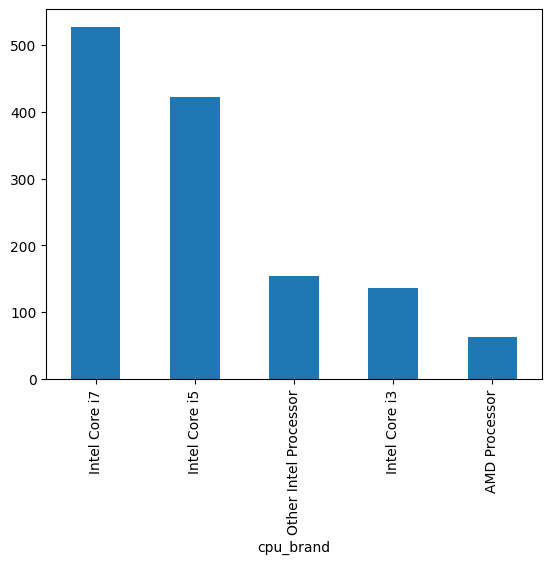

In [38]:
df['cpu_brand'].value_counts().plot(kind='bar')

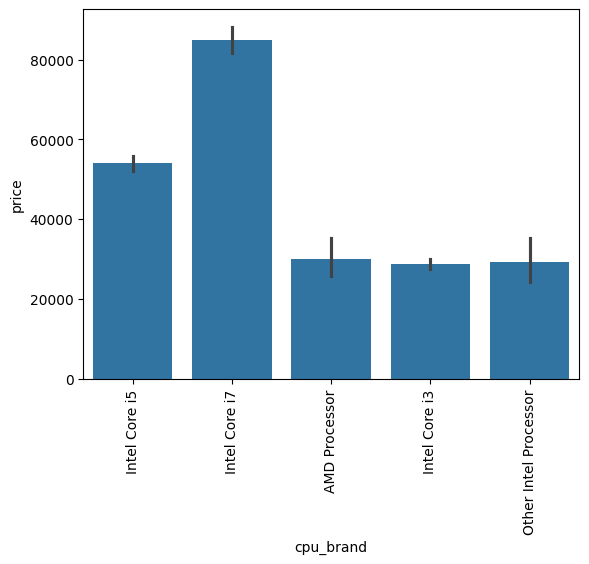

In [39]:
sns.barplot(x=df['cpu_brand'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ram', ylabel='price'>

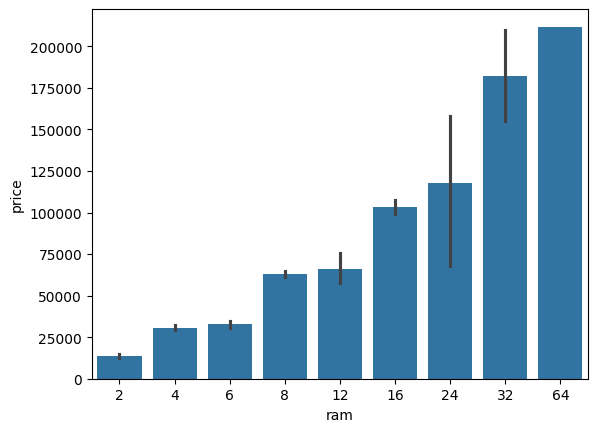

In [40]:
sns.barplot(x=df['ram'], y=df['price'])

In [41]:
df['memory'].value_counts()

memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [42]:
# --- Clean Memory column ---
df['memory'] = df['memory'].astype(str).replace('\.0', '', regex=True)

# Handle TB correctly, then remove GB
df["memory"] = df["memory"].str.replace('TB', '000GB', regex=False)
df["memory"] = df["memory"].str.replace('GB', '', regex=False)

# Split into two parts (if + exists)
new = df["memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1]

# Fill missing second part
df["second"].fillna("0", inplace=True)

# -------- Layer 1 type detection --------
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# -------- Layer 2 type detection --------
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# -------- Extract only numbers (IMPORTANT FIX) --------
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert to int
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# -------- Final storage columns --------
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop helper columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1236\3601160064.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace=True)


In [43]:
df.sample(5)

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
924,Lenovo,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 620,Windows 10,1.37,97236.0000,1,1,165.632118,Intel Core i5,0,512,0,0
1065,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,77682.2400,0,0,165.632118,Intel Core i7,0,256,0,0
569,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.02,52747.2000,0,0,111.935204,Intel Core i5,500,0,0,0
579,Dell,Notebook,8,256 SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0,141.211998,Intel Core i7,0,256,0,0
1170,HP,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.96,36177.1200,0,0,141.211998,Intel Core i7,0,256,0,0


In [44]:
df.corr(numeric_only=True)['price']

ram              0.743007
weight           0.210370
price            1.000000
touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price, dtype: float64

In [45]:
# Drop Hybrid and Flash_Storage due to low correlation with price
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [46]:
df['gpu'].value_counts()

gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [47]:
df['gpu'].apply(lambda x: x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: gpu, Length: 1303, dtype: object

In [48]:
df['gpu_brand'] = df['gpu'].apply(lambda x: x.split()[0])

In [49]:
df.head(2)

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [50]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [51]:
df = df[df['gpu_brand'] != 'ARM']

In [52]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

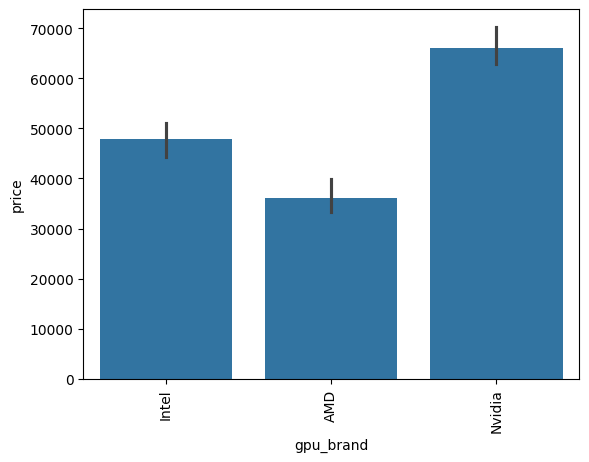

In [53]:
sns.barplot(x=df['gpu_brand'], y=df['price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(columns=['memory', 'gpu'], inplace=True)

In [55]:
df.head()

,company,typename,ram,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
df['opsys'].value_counts()

opsys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

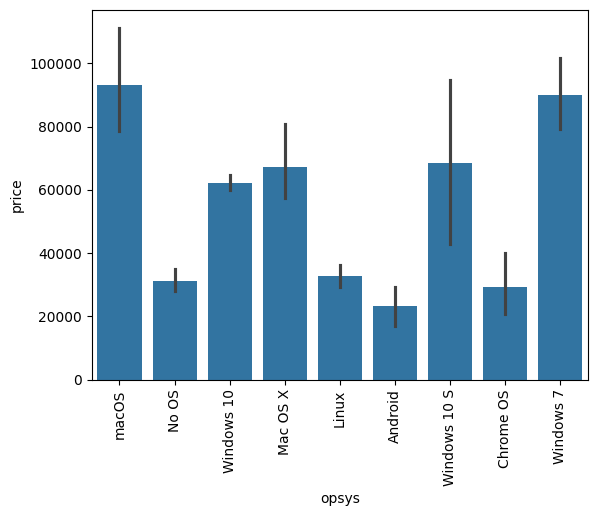

In [57]:
sns.barplot(x=df['opsys'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
def cat_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No Os/Linux'

In [59]:
df['opsys'] = df['opsys'].apply(cat_os)

In [60]:
df.head()

,company,typename,ram,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No Os/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


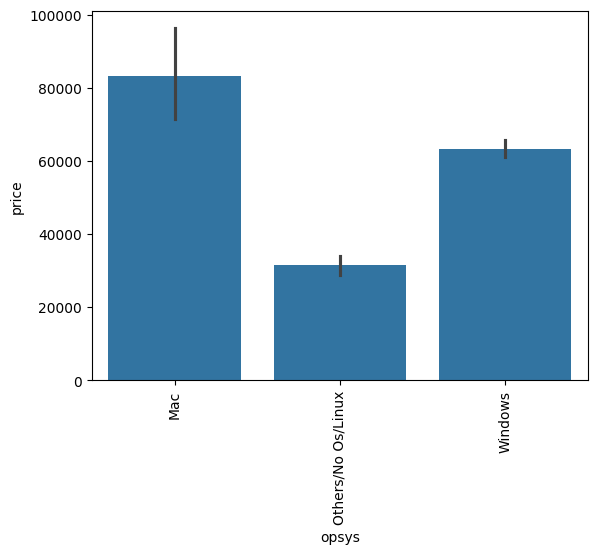

In [61]:
sns.barplot(x=df['opsys'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='weight', ylabel='price'>

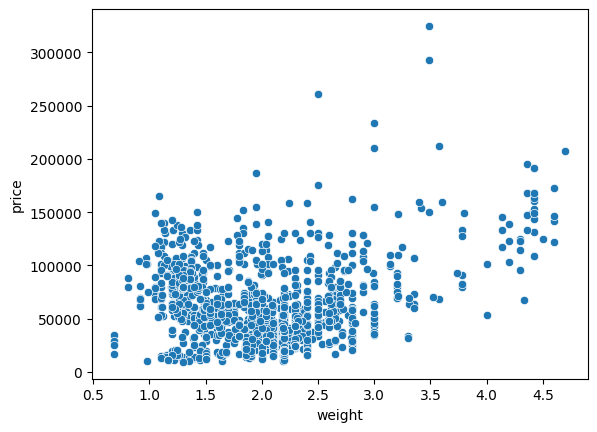

In [62]:
sns.scatterplot(x=df['weight'], y=df['price'])

In [63]:
df.corr(numeric_only=True)['price']

ram            0.742905
weight         0.209867
price          1.000000
touchscreen    0.192917
ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: price, dtype: float64

<Axes: >

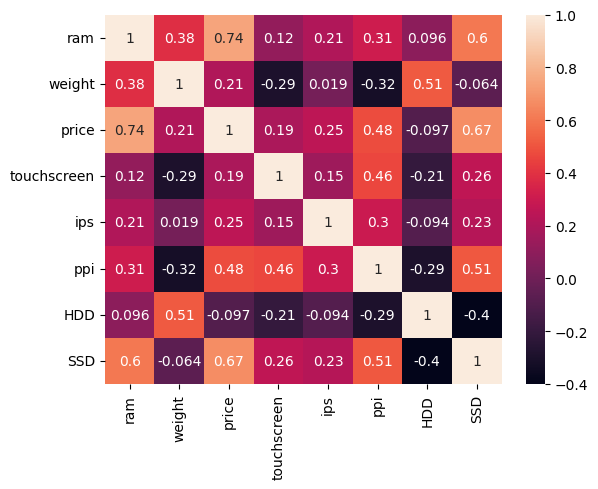

In [64]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1236\2721140454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

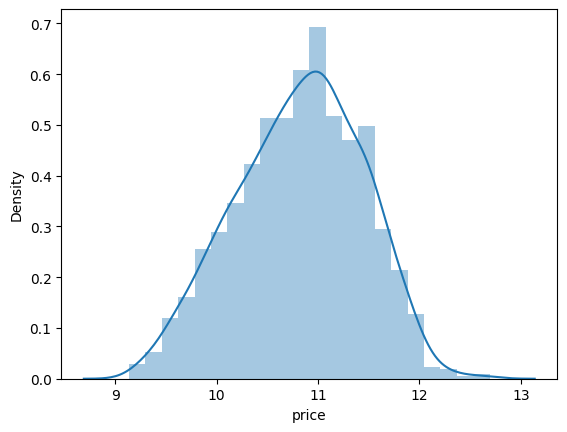

In [65]:
sns.distplot(np.log(df['price']))

In [66]:
X = df.drop(columns='price')
y = np.log(df['price'])

In [67]:
X

,company,typename,ram,opsys,weight,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No Os/Linux,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD


In [68]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: price, Length: 1302, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [70]:
X_train

,company,typename,ram,opsys,weight,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
945,Lenovo,Gaming,16,Windows,2.50,0,1,141.211998,AMD Processor,1000,512,AMD
428,HP,Gaming,12,Windows,3.35,0,0,127.335675,Intel Core i7,1000,256,Nvidia
1261,Asus,Ultrabook,8,Windows,1.20,0,1,165.632118,Other Intel Processor,0,512,Intel
174,HP,Notebook,8,Windows,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia
398,Dell,Workstation,8,Windows,1.78,1,0,282.423996,Intel Core i7,0,256,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,Windows,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia
1130,HP,Notebook,8,Windows,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel
1295,Dell,Notebook,8,Others/No Os/Linux,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD
860,Lenovo,Notebook,8,Windows,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel


## Model Training

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear regression

In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7925383261417354
MAE 0.21373076712767586


### Ridge Regression

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7835783696856734
MAE 0.22051894011132187


### Lasso Regression

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7871774843528642
MAE 0.21833148772028893


### KNN

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7345001810329981
MAE 0.23251953441809586


### Decision Tree

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8200947841062531
MAE 0.19470309983823458


### SVM

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8118249921851006
MAE 0.1925419581757836


### Random Forest

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8513077041949594
MAE 0.17273466722359118


### Extra Trees

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=50,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8615338002990693
MAE 0.1673715539999293


### AdaBoost

In [140]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7408662748086866
MAE 0.25200898412123984


### Gradient Boost

In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8601072049660743
MAE 0.16757476354979997


### XgBoost

In [145]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=39,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8777175443583942
MAE 0.1589978607188169


### Voting Regressor

In [88]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8669573270916625
MAE 0.16429974784823867


### Stacking

In [89]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8478516314137664
MAE 0.1824271253759624


In [90]:
df.shape

(1302, 13)

In [91]:
X_train.shape

(1106, 12)

### XGBoost Performs the best result 
- R2 score 0.8777175443583942
- MAE 0.1589978607188169

## Exporting the Model

In [146]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

## EDA
### Univariate analysis 

<Axes: xlabel='touchscreen', ylabel='price'>

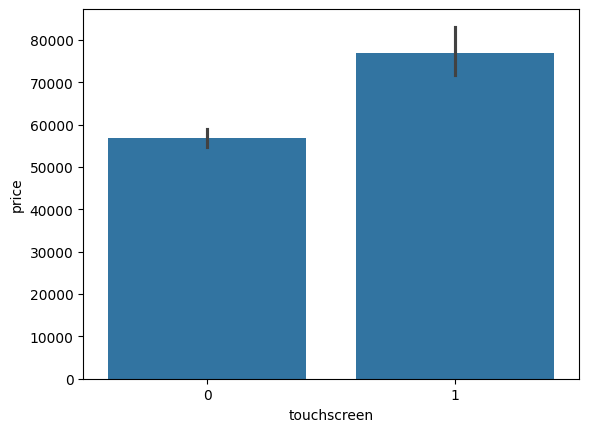

In [ ]:
sns.barplot(x=df['touchscreen'], y=df['price'])

In [ ]:
df['ips'].value_counts()

ips
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='ips', ylabel='price'>

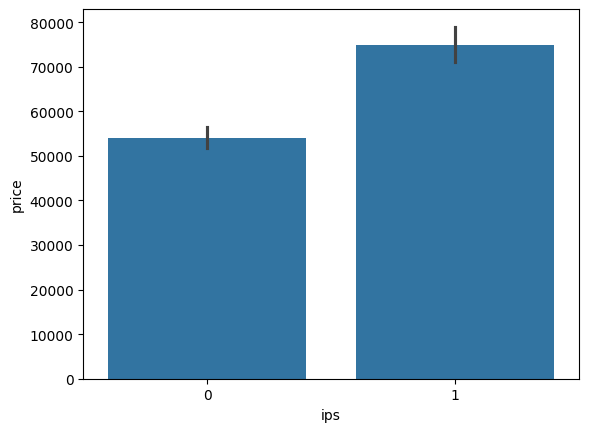

In [ ]:
sns.barplot(x=df['ips'], y=df['price'])

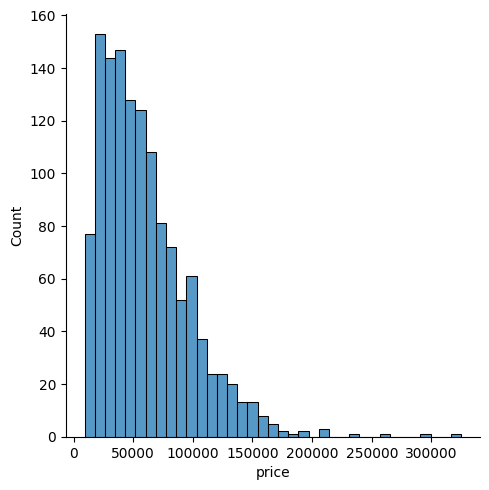

In [ ]:
import seaborn as sns

# Visualize the distribution of the target variable 'price'
sns.displot(df['price'])

<Axes: xlabel='company'>

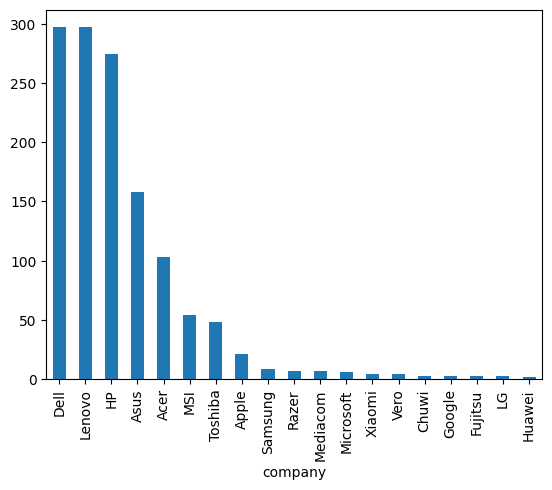

In [ ]:
df['company'].value_counts().plot(kind='bar')

<Axes: xlabel='typename'>

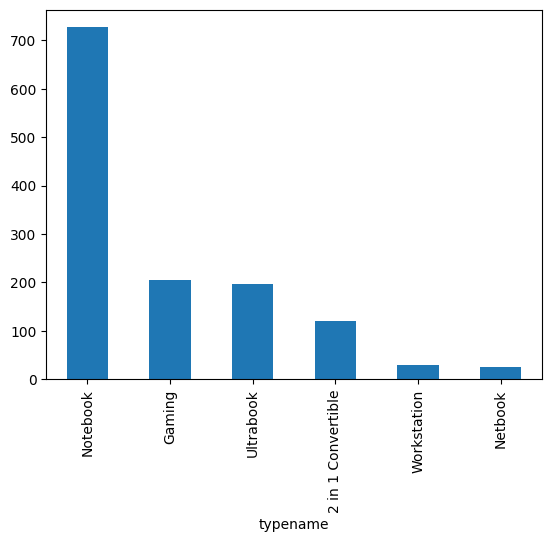

In [ ]:
df['typename'].value_counts().plot(kind='bar')

<Axes: xlabel='inches'>

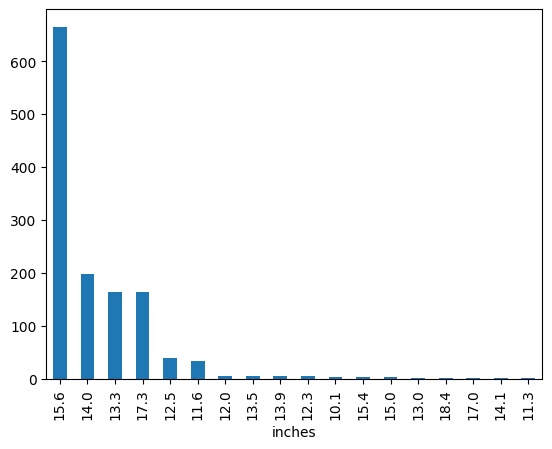

In [ ]:
df['inches'].value_counts().plot(kind='bar')

<Axes: xlabel='inches', ylabel='price'>

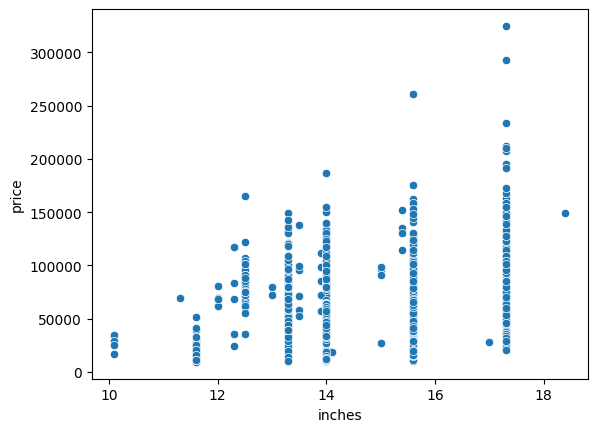

In [ ]:
sns.scatterplot(x=df['inches'], y=df['price'])

### Bivariate Analysis 

In [ ]:
import matplotlib.pyplot as plt

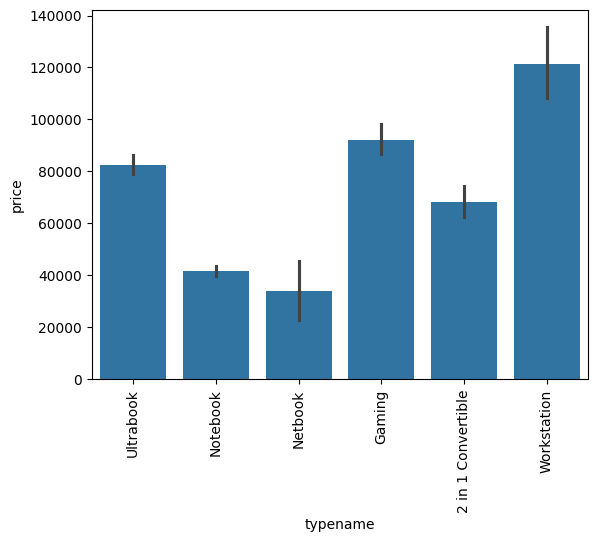

In [ ]:
sns.barplot(x=df['typename'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

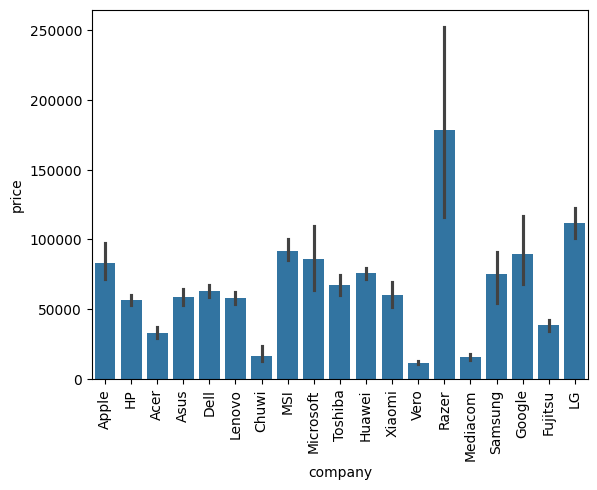

In [ ]:

sns.barplot(x=df['company'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()